# Video Game Sales

Analyze sales data from more than 16,500 games.  
source: https://www.kaggle.com/datasets/gregorut/videogamesales  

That dataset contains a list of video games with sales greater than 100,000 
copies. It was generated by a scrape of vgchartz.com.  

_Created on Thu Mar 23 16:32:54 2023_  
__@author: fausto__

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

## LOADING DATASET

In [3]:
dataset = pd.read_csv('data/games.csv')

In [4]:
dataset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## DATA UNDERSTANDING

In [5]:
dataset[(dataset['Publisher'] == 'Nintendo') & (dataset['Genre'] == 'Platform')].head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
18,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,NaN,NaN,NaN,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,NaN,NaN,NaN,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28,NaN,NaN,NaN,NaN,NaN,NaN
45,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89,NaN,NaN,NaN,NaN,NaN,NaN
49,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.06,3.35,1.20,0.74,11.35,97.0,73.0,8.9,2147.0,Nintendo,E
53,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,3.00,2.14,0.78,10.81,90.0,82.0,8.4,921.0,Nintendo,E
56,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
dataset.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


### List Platforms

In [8]:
dataset['Platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

### List Genre

In [9]:
dataset['Genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

### Count games by year of release

In [10]:
gb_year_release = dataset.groupby(['Year_of_Release'])['Year_of_Release'].count()
gb_year_release

Year_of_Release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

## DATA VISUALIZATION

In [11]:
def plot_barh(series, title=None, ylabel=None, xlabel=None):
    
    plt.figure(figsize=(15, 11), dpi=75)
    ax = plt.subplot()

    x = series.values
    y = series.index
    ax.barh(y, x)

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

### Rank Games by Platform

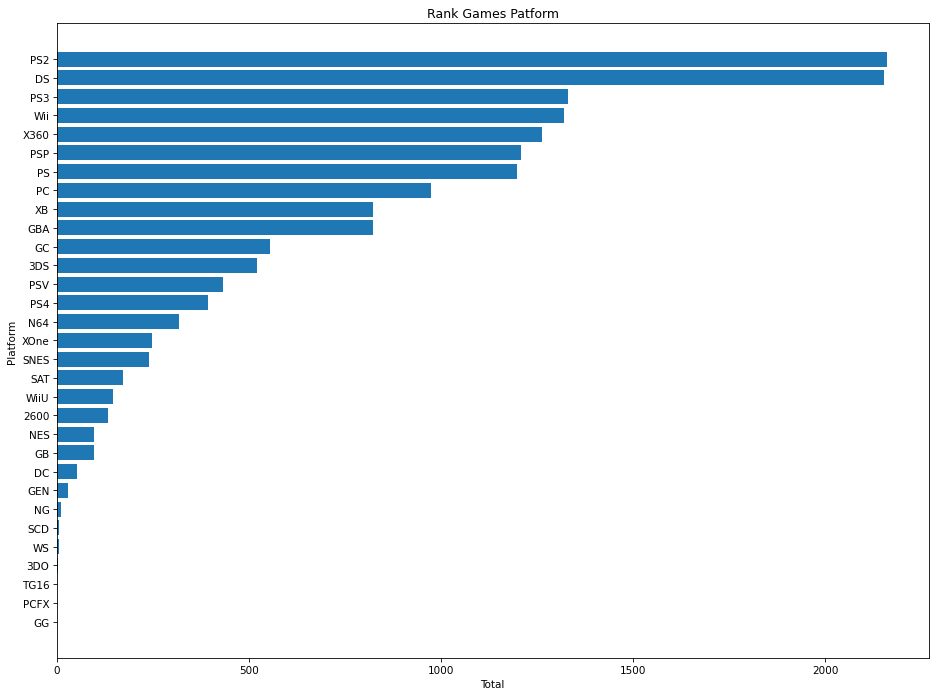

In [12]:
gb_platforms = dataset.groupby(['Platform'])['Platform'].count()
gb_platforms_asc = gb_platforms.sort_values(ascending=True)

plot_barh(gb_platforms_asc, 'Rank Games Patform', 'Platform', 'Total')

### Rank Games by Genre

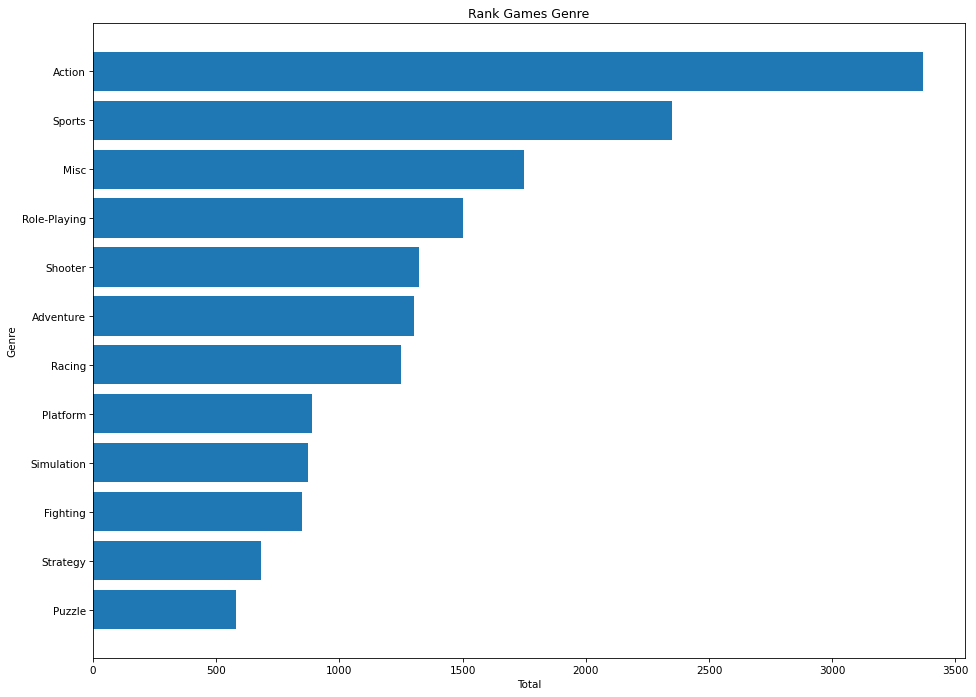

In [13]:
gb_genres = dataset.groupby(['Genre'])['Genre'].count()
gb_genres_asc = gb_genres.sort_values(ascending=True)

plot_barh(gb_genres_asc, 'Rank Games Genre', 'Genre', 'Total')

## DATA PREPARATION

### Feature _Name_

In [14]:
nan_names = dataset[dataset['Name'].isna()]
nan_names

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


#### Remove unnamed games

_Pay attention that games without genre will be removed as well_

In [15]:
dataset.drop(nan_names.index, inplace=True)

In [16]:
count_names = dataset[dataset['Name'].isna()]['Name'].count()
count_genres = dataset[dataset['Genre'].isna()]['Genre'].count()
print("NaN Names=%d, NaN Genres=%d" % (count_names, count_genres))

NaN Names=0, NaN Genres=0


### Feature Publisher

#### NaN Publisher with Developer

_Define the Publisher with the highest occurrence of the Developer company._

In [17]:
def get_highest_publisher(develper):
    '''
    Find the highest occurrence Publisher related with the developer company.
    '''
    data_develper = dataset[dataset['Developer'] == develper]
    count_grouped_publisher = data_develper.groupby(['Publisher'])['Publisher'].count()
            
    if count_grouped_publisher.empty:    
        return None
    else:
        return count_grouped_publisher[count_grouped_publisher == count_grouped_publisher.max()].index[0]


In [18]:
developer = dataset[(dataset['Publisher'].isna()) & (dataset['Developer'].notna())]['Developer']
for item in developer.items():
    index, value = item[0], item[1]
    dataset.loc[index, 'Publisher'] = get_highest_publisher(value)

In [19]:
dataset[(dataset['Publisher'].isna()) & (dataset['Developer'].notna())]['Developer'].count()

1

#### NaN Publisher without Developer

In [20]:
nan_publisher = dataset[dataset['Publisher'].isna()]
dataset.drop(nan_publisher.index, inplace=True)

### Feature Publisher

#### Show games whitout Rating

In [21]:
dataset[dataset['Rating'].isna()].count()

Name               6722
Platform           6722
Year_of_Release    6650
Genre              6722
Publisher          6722
NA_Sales           6722
EU_Sales           6722
JP_Sales           6722
Other_Sales        6722
Global_Sales       6722
Critic_Score         83
Critic_Count         83
User_Score          136
User_Count           86
Developer           146
Rating                0
dtype: int64

In [22]:
dataset[(dataset['Developer'].notna()) &  (dataset['Rating'].isna())]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
693,Tomb Raider II,PC,1997.0,Action,Eidos Interactive,0.91,1.25,0.00,0.13,2.29,NaN,NaN,8.3,37.0,Core Design Ltd.,NaN
822,R4: Ridge Racer Type 4,PS,1998.0,Racing,Namco Bandai Games,0.68,0.46,0.79,0.13,2.06,88.0,18.0,9.2,21.0,Namco,NaN
1763,Football Manager 2013,PC,2012.0,Sports,Sega,0.00,0.95,0.00,0.21,1.15,86.0,37.0,6.7,228.0,Sports Interactive,NaN
2054,Monster Rancher,PS,1997.0,Simulation,Tecmo Koei,0.12,0.08,0.74,0.07,1.01,86.0,5.0,8.3,10.0,Tecmo,NaN
2139,Dragon Quest X,Wii,2012.0,Role-Playing,Square Enix,0.00,0.00,0.96,0.00,0.96,NaN,NaN,NaN,NaN,Square Enix,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16504,Root Letter,PS4,2016.0,Adventure,PQube,0.00,0.00,0.01,0.00,0.01,69.0,13.0,7.5,11.0,Kadokawa,NaN
16516,Colin McRae Rally 04,PC,2004.0,Racing,Codemasters,0.00,0.01,0.00,0.00,0.01,87.0,6.0,7.2,44.0,Codemasters,NaN
16659,Summer Athletics,PC,2008.0,Sports,DTP Entertainment,0.00,0.01,0.00,0.00,0.01,NaN,NaN,tbd,NaN,49Games,NaN
16664,Prison Architect,XOne,2016.0,Action,Introversion Software,0.01,0.00,0.00,0.00,0.01,74.0,13.0,6.7,7.0,"Introversion, Double Eleven",NaN


In [23]:
def get_applicable_rating_by_developer(dataset, developer, platform, genre):
    """
    Get the more relevant rating.
    Concept: Company 'D' developed a total of 'R' ratings games for Platform 'P' whose genre is 'G'.
    """
    
    # Get No-None Developer and Rating Games
    nona_dr = dataset[(dataset['Developer'].notna()) &  (dataset['Rating'].notna())]
    
    #Groupby No-None Developer and Rating Games
    grouped = nona_dr.groupby(['Developer', 'Platform', 'Genre'], as_index=False)['Rating'].value_counts()
    
    # Getting max number of count column
    max_value = grouped[
        (grouped['Developer'] == developer) & 
        # (grouped['Platform'] == platform) & 
        (grouped['Genre'] == genre)
    ]['count'].max()
    
    
    
    # get rating of max value
    rating = grouped[
        (grouped['Developer'] == developer) & 
        # (grouped['Platform'] == platform) & 
        (grouped['Genre'] == genre) & 
        (grouped['count'] == max_value)
    ]['Rating']
        
    
    return rating.values[0] if not rating.empty else None

In [24]:
def get_applicable_rating_by_publisher(dataset, publisher, platform, genre):
    """
    Get the more relevant rating.
    Concept: Publisher 'P' has a total of 'R' ratings games for Platform 'P' whose genre is 'G'.
    """
    
    # Get No-None publisher and Rating Games
    nona_dr = dataset[(dataset['Publisher'].notna()) & (dataset['Rating'].notna())]
    
    #Groupby No-None Publisher and Rating Games
    grouped = nona_dr.groupby(['Publisher', 'Platform', 'Genre'], as_index=False)['Rating'].value_counts()
    
    # Getting max number of count column
    max_value = grouped[
        (grouped['Publisher'] == publisher) & 
        # (grouped['Platform'] == platform) & 
        (grouped['Genre'] == genre)
    ]['count'].max()
    
        
    # get rating of max value
    rating = grouped[
        (grouped['Publisher'] == publisher) & 
        # (grouped['Platform'] == platform) & 
        (grouped['Genre'] == genre) & 
        (grouped['count'] == max_value)
    ]['Rating']
        
    
    return rating.values[0] if not rating.empty else None    

In [25]:
def get_applicable_rating_by_platform(dataset, platform, genre):
    """
    Get the more relevant rating.
    Concept: Rratings games for Platform 'P' whose genre is 'G'.
    """
    
    # Get No-None publisher and Rating Games
    nona_dr = dataset[(dataset['Platform'].notna()) & (dataset['Rating'].notna())]
    
    #Groupby No-None Publisher and Rating Games
    grouped = nona_dr.groupby(['Platform', 'Genre'], as_index=False)['Rating'].value_counts()
    
    # Getting max number of count column
    max_value = grouped[
        (grouped['Platform'] == platform) & 
        (grouped['Genre'] == genre)
    ]['count'].max()
    
        
    # get rating of max value
    rating = grouped[
        (grouped['Platform'] == platform) & 
        (grouped['Genre'] == genre) & 
        (grouped['count'] == max_value)
    ]['Rating']
        
    
    return rating.values[0] if not rating.empty else None    

#### Defines the rating of game based on the developer's most relevant genre on the platform

In [26]:
na_rating = dataset[(dataset['Developer'].notna()) &  (dataset['Rating'].isna())]

for ind in na_rating.index:
    developer = na_rating['Developer'][ind]
    platform = na_rating['Platform'][ind]
    genre = na_rating['Genre'][ind]
    
    rating = get_applicable_rating_by_developer(dataset, developer, platform, genre)
    dataset.loc[ind, 'Rating'] = rating    

#### Defines the rating of game based on the publisher's most relevant genre on the platform

In [27]:
na_rating = dataset[(dataset['Publisher'].notna()) & (dataset['Rating'].isna())]

for ind in na_rating.index:
    publisher = na_rating['Publisher'][ind]
    platform = na_rating['Platform'][ind]
    genre = na_rating['Genre'][ind]
    
    rating = get_applicable_rating_by_publisher(dataset, publisher, platform, genre)
    dataset.loc[ind, 'Rating'] = rating    

#### Defines the rating of game based on the most relevant genre in platform

In [28]:
na_rating = dataset[(dataset['Platform'].notna()) & (dataset['Rating'].isna())]

for ind in na_rating.index:
    platform = na_rating['Platform'][ind]
    genre = na_rating['Genre'][ind]
    
    rating = get_applicable_rating_by_platform(dataset, platform, genre)
    dataset.loc[ind, 'Rating'] = rating    

### Drop games without rating

In [29]:
dataset = dataset[dataset['Rating'].notna()]

### Drop columns that will not be used

#### Drop columns NaN

In [30]:
dataset = dataset.drop('Developer', axis=1)
dataset = dataset.drop('Critic_Score', axis=1)
dataset = dataset.drop('Critic_Count', axis=1)
dataset = dataset.drop('User_Score', axis=1)
dataset = dataset.drop('User_Count', axis=1)

#### Drop others columns 

In [31]:
dataset = dataset.drop('Name', axis=1)
dataset = dataset.drop('Year_of_Release', axis=1)
dataset = dataset.drop('NA_Sales', axis=1)
dataset = dataset.drop('EU_Sales', axis=1)
dataset = dataset.drop('JP_Sales', axis=1)
dataset = dataset.drop('Other_Sales', axis=1)

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16665 entries, 0 to 16718
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      16665 non-null  object 
 1   Genre         16665 non-null  object 
 2   Publisher     16665 non-null  object 
 3   Global_Sales  16665 non-null  float64
 4   Rating        16665 non-null  object 
dtypes: float64(1), object(4)
memory usage: 781.2+ KB


### Encoder Categorical Feature

In [33]:
categorical_cols = ['Platform', 'Genre', 'Publisher', 'Rating']

#### Label Encoder

In [34]:
le = LabelEncoder()
dataset[categorical_cols] = dataset[categorical_cols].apply(le.fit_transform)

In [35]:
dataset.head()

,Platform,Genre,Publisher,Global_Sales,Rating
0,24,10,360,82.53,1
1,11,4,360,40.24,1
2,24,6,360,35.52,1
3,24,10,360,32.77,1
4,5,7,360,31.37,1


#### One-Hot Encoding

In [36]:
pd.get_dummies(dataset, columns=categorical_cols)

,Global_Sales,Platform_0,Platform_1,Platform_2,Platform_3,Platform_4,Platform_5,Platform_6,Platform_7,Platform_8,...,Publisher_577,Publisher_578,Rating_0,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5,Rating_6,Rating_7
0,82.53,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,40.24,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35.52,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,32.77,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,31.37,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,0.01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16715,0.01,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16716,0.01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16717,0.01,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### Save processed dataset in csv file

In [ ]:
dataset.to_csv('data/out.csv', index=False)